## `scipy.interpolate`模块有一维插值函数`interp1d`、二维插值函数`interp2d`、多维插值函数`interpnd`

### interp1d基本调用格式

interp1d(x, y, kind = 'linear')

kind in ('linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'previous', 'next', where 'zero', 'slinear', 'quadratic' and 'cubic')

This class returns a function whose call method uses interpolation to find the value of new points.

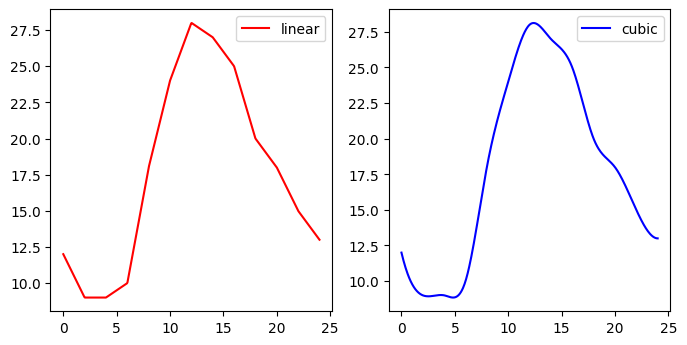

In [1]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt

# 一维插值
x = np.arange(0, 26, 2)
y = np.array([12, 9, 9, 10, 18, 24, 28, 27, 25, 20, 18, 15, 13])
# 插值点
xnew = np.linspace(0, 24, 500)
# 分段线性插值
f1 = interp1d(x, y, kind = 'linear')
y1 = f1(xnew)
# 三次样条插值
f2 = interp1d(x, y, kind = 'cubic')
y2 = f2(xnew)
# 作图
fig = plt.figure(figsize = (8, 4), dpi = 100)
ax1 = fig.add_subplot(121)
ax1.plot(xnew, y1, label = 'linear', color = 'r')
ax1.legend()
ax2 = fig.add_subplot(122)
ax2.plot(xnew, y2, label = 'cubic', color = 'b')
ax2.legend()
plt.show()

## `Numpy`库中的多项式拟合函数`ployfit`

### `ployfit`用法

polyfit(x, y, deg)

deg: Degree of the fitting polynomial

return:  Polynomial coefficients, highest power first

### `ployval`用法(求一个多项式在特定值处的值)

polyval(p, x)

p: 从最高次到常数项的多项式系数(包括等于零的系数)的一维数组，或poly1d的一个实例

x: 一个数字或一个数字数组

[-9.81083916 20.12929371 -0.03167133]
[4.38747465 5.81175367]


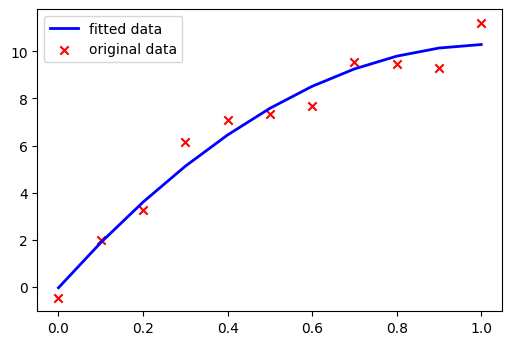

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x0 = np.arange(0, 1.1, 0.1)
y0 = np.array([-0.447, 1.978, 3.28, 6.16, 7.08, 7.34, 7.66, 9.56, 9.48, 9.30, 11.2])
# 拟合二次多项式
p = np.polyfit(x0, y0, 2)
# 拟合的二次多项式，从高到低次幂
print(p)
# 计算特殊点处的值
yhat = np.polyval(p, [0.25, 0.35])
print(yhat)
# 作图
fig = plt.figure(dpi = 100)
ax = fig.add_subplot(111)
ax.scatter(x0, y0, marker = 'x', color = 'r', label = "original data")
ax.plot(x0, np.polyval(p, x0), linewidth = 2, color = 'b', label = "fitted data")
ax.legend()
plt.show()


## `scipy.optimize`模块中的函数`leastsq`，`curve_fit`都可以拟合函数

### `curve_fit`用法

popt, pcov = curve_fit(f, xdata, ydata)

f: 待拟合的函数(它必须将自变量作为第一个参数，将其他参数作为单独的参数)

xdata: 自变量的观测值

ydata: 因变量的观测值

popt: 拟合的参数

pcov: 参数协方差矩阵

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 待拟合函数，自变量为x
fun = lambda x, a, b, c: a * x ** 2 + b * x + c
# 数据
x0 = np.arange(0, 1.1, 0.1)
y0 = np.array([-0.447, 1.978, 3.28, 6.16, 7.08, 7.34, 7.66, 9.56, 9.48, 9.30, 11.2])
# 拟合
popt, pcov = curve_fit(fun, x0, y0)
print("拟合的参数值为：", popt)
# 预测值
print("预测值：", fun(np.array([0.25, 0.35]), *popt))

拟合的参数值为： [-9.81083901 20.12929291 -0.03167108]
预测值： [4.38747471 5.81175366]


### 拟合函数 $ z = ae^{bx} + cy^2 $

a, b, c的拟合值为： [ 5.08907305e+00 -2.58248004e-03 -2.14509683e-02]


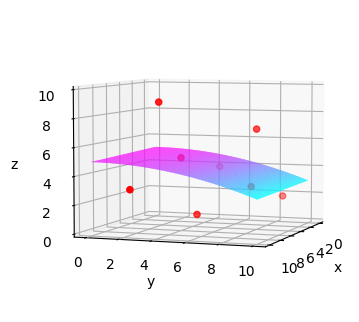

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 数据
x0 = np.array([6, 2, 6, 7, 4, 2, 5, 9])
y0 = np.array([4, 9, 5, 3, 8, 5, 8, 2])
z0 = np.array([5, 2, 1, 9, 7, 4, 3, 3])
# 垂直拼接
xy0 = np.vstack((x0, y0))
# 定义拟合函数
fun = lambda t, a, b, c: a * np.exp(b * t[0]) + c * t[1] ** 2
# 拟合
popt, pcov = curve_fit(fun, xy0, z0)
print("a, b, c的拟合值为：", popt)
# 作图
x = np.linspace(0, 10, 200)
y = np.linspace(0, 10, 200)
X, Y = np.meshgrid(x, y)
Z = fun([X, Y], *popt)
fig = plt.figure(dpi = 100)
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, Z, cmap = 'cool')
ax.scatter(x0, y0, z0, c = 'r')
ax.view_init(elev = 5, azim = 20)
ax.set_zlim(0, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()